# Capgemini Employee Happiness

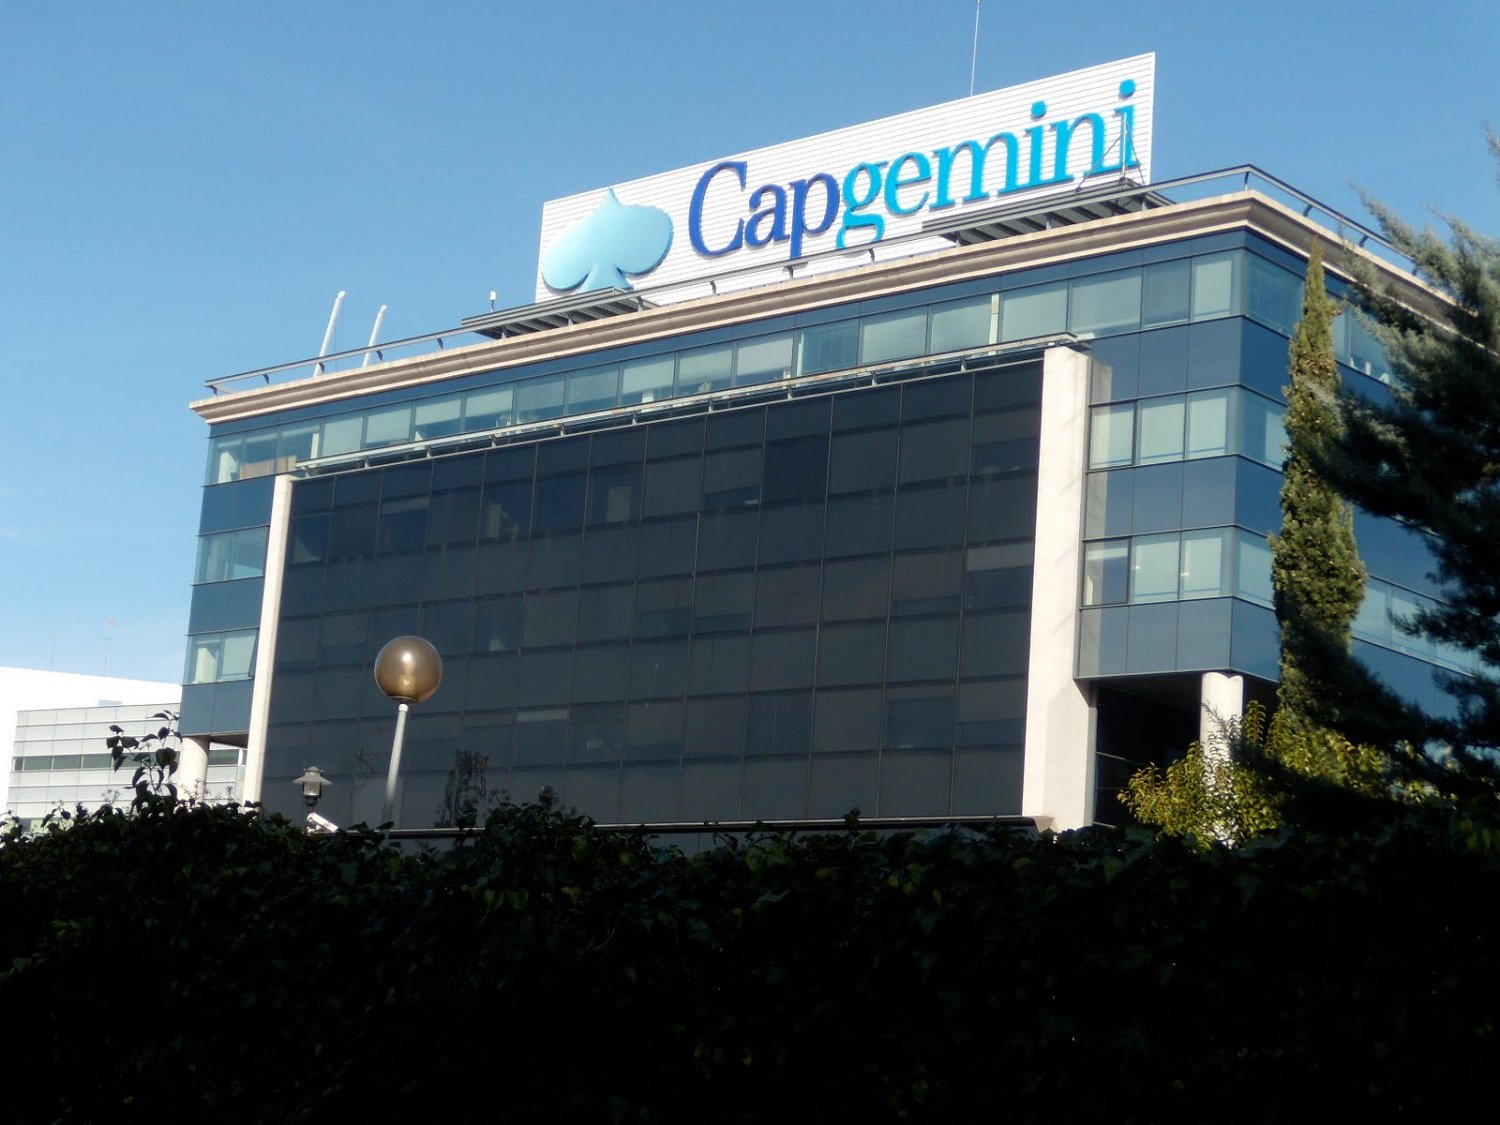

# Project Description:

Our team is excited to embark on this class project that places a strong focus on harnessing the power of machine learning techniques to delve into the realm of employee satisfaction within the Capgemini company. Our primary objective is to get valuable insights into the numerous factors that underlie employee satisfaction in this specific organization. Through this analysis, we aim to predict employee satisfaction ratings using a diverse set of machine learning techniques, including but not limited to sentiment analysis and classification algorithms.


The potential outcomes of this analysis hold significant promise for Capgemini and similar companies. By tapping into the predictive power of machine learning, our project has the capacity to significantly elevate employee morale and overall satisfaction. Furthermore, it could equip a company with the knowledge needed to make data-driven decisions and implement targeted strategies aimed at optimizing the working environment and enhancing the overall employee experience.
 

To facilitate this endeavor, we will be utilizing a Kaggle dataset that captures self-reported employee satisfaction data from within Capgemini. This dataset will serve as the foundational basis for our analysis. In our pursuit of comprehensive understanding, we may augment this primary dataset with additional relevant data sources. These supplementary datasets may include information on salary structures, demographics, and other factors that are not originally included in the core dataset. By incorporating this supplementary data, we aim to gain a more holistic perspective on the intricacies of employee satisfaction, and thereby refine the accuracy and depth of our predictive models.
 

By the conclusion of this project, we anticipate having not only a predictive model for employee satisfaction but also a wealth of knowledge that can empower Capgemini and similar enterprises to cultivate a more positive and productive work environment for their staff.


References:

 https://www.kaggle.com/datasets/manishkr1754/capgemini-employee-reviews-dataset

 

# The Model

The data is an extensive survey done at the Capgemini company to evaluate the overall employees' satisfaction in their jobs.

Here is an overview of the file:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Capgemini_Employee_Reviews_from_AmbitionBox.csv')


In [3]:
df.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,4.0,4.0,Deserved candidates are promoted promptly.\r\n...,With designation promotions good salary increm...
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,4.0,3.0,You got lot of learning platform and monthly l...,You will get fully not tech project.\r\nThere ...
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,4.0,3.0,Based on which Business Unit you are you will ...,Some top level management people bring bad nam...
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,1.0,1.0,Some client projects are good as they use the ...,"Culture, micro management, unprofessional beha..."
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,4.0,3.0,"I have worked in IBM (4 years) ,TCS (1 year) ,...",Medical insurance amount is quite low compare ...


In [4]:
column_names = df.columns.tolist()
df_cols = pd.DataFrame( {'Columns': column_names} )

# Print the list of column names
df_cols

,Columns
0,Title
1,Place
2,Job_type
3,Department
4,Date
5,Overall_rating
6,work_life_balance
7,skill_development
8,salary_and_benefits
9,job_security


### Remove rows where overall_rating is null

In [5]:
df = df.dropna(subset=['Overall_rating'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25898 entries, 0 to 26975
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25895 non-null  object 
 1   Place                24587 non-null  object 
 2   Job_type             11555 non-null  object 
 3   Department           22068 non-null  object 
 4   Date                 25898 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    25886 non-null  float64
 7   skill_development    25886 non-null  float64
 8   salary_and_benefits  25877 non-null  float64
 9   job_security         25876 non-null  float64
 10  career_growth        25868 non-null  float64
 11  work_satisfaction    25866 non-null  float64
 12  Likes                23852 non-null  object 
 13  Dislikes             22955 non-null  object 
dtypes: float64(7), object(7)
memory usage: 3.0+ MB


In [7]:
filename = 'data/Capgemini_Employee_Reviews_Overall_rating.csv'
df.to_csv(filename, index=False)

In [8]:
df.Overall_rating.value_counts()

Overall_rating
4.0    8465
5.0    8369
3.0    4705
1.0    2528
2.0    1831
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_plot(var, dt=df, color='blue'):
    d = dt[[var]].sort_values(by=var)
    sns.countplot(x = var, data = d, palette=[color]).legend(labels = ['Count'])
    plt.title(var)

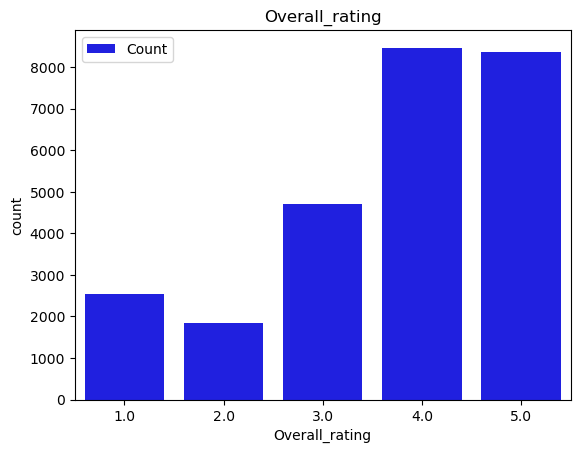

In [10]:
count_plot('Overall_rating')

# Yonghee - Data preProcessing

In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import os

In [12]:
# number of unique records, total records and column data type
for col in df.columns:
    a = col,len(df[col].unique()),len(df[col])
    b=df[col].dtypes
    print(a,b)

('Title', 4236, 25898) object
('Place', 829, 25898) object
('Job_type', 6, 25898) object
('Department', 620, 25898) object
('Date', 739, 25898) object
('Overall_rating', 5, 25898) float64
('work_life_balance', 6, 25898) float64
('skill_development', 6, 25898) float64
('salary_and_benefits', 6, 25898) float64
('job_security', 6, 25898) float64
('career_growth', 6, 25898) float64
('work_satisfaction', 6, 25898) float64
('Likes', 17498, 25898) object
('Dislikes', 17551, 25898) object


In [13]:
df.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
count,25898.000000,25886.000000,25886.000000,25877.000000,25876.000000,25868.000000,25866.000000
mean,3.707236,3.677316,3.650236,3.049233,3.798269,3.641526,3.177608
std,1.257180,1.282316,1.264686,1.333616,1.261530,1.325323,1.347493
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:14]

Title                      3
Place                   1311
Job_type               14343
Department              3830
Date                       0
Overall_rating             0
work_life_balance         12
skill_development         12
salary_and_benefits       21
job_security              22
career_growth             30
work_satisfaction         32
Likes                   2046
Dislikes                2943
dtype: int64

In [17]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
round((total_missing/total_cells) * 100,2)

6.79

In [18]:
total_cells

362572

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent_Missing'])
missing_data.head(20)

,Total_Missing,Percent_Missing
Job_type,14343,55.382655
Department,3830,14.788787
Dislikes,2943,11.363812
Likes,2046,7.900224
Place,1311,5.062167
work_satisfaction,32,0.123562
career_growth,30,0.115839
job_security,22,0.084949
salary_and_benefits,21,0.081087
work_life_balance,12,0.046336


count    25898.000000
mean         3.707236
std          1.257180
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Overall_rating, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

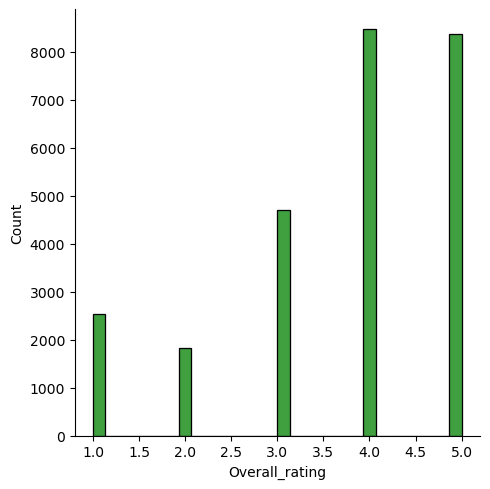

In [20]:
print(df['Overall_rating'].describe())
plt.figure(figsize=(8,6))
sns.displot(df['Overall_rating'],color='green');

count         11555
unique            5
top       Full Time
freq          11339
Name: Job_type, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

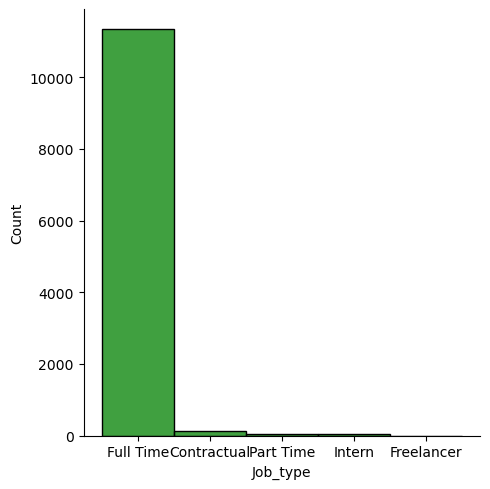

In [21]:
print(df['Job_type'].describe())
plt.figure(figsize=(8,6))
sns.displot(df['Job_type'],color='green');

count                               22068
unique                                619
top       Software Development Department
freq                                 8932
Name: Department, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

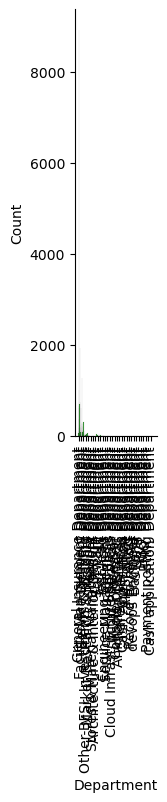

In [22]:
print(df['Department'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Department'],color='green');

x_labels = df['Department'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Department")
plt.show()

count         24587
unique          828
top       Bangalore
freq           2972
Name: Place, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

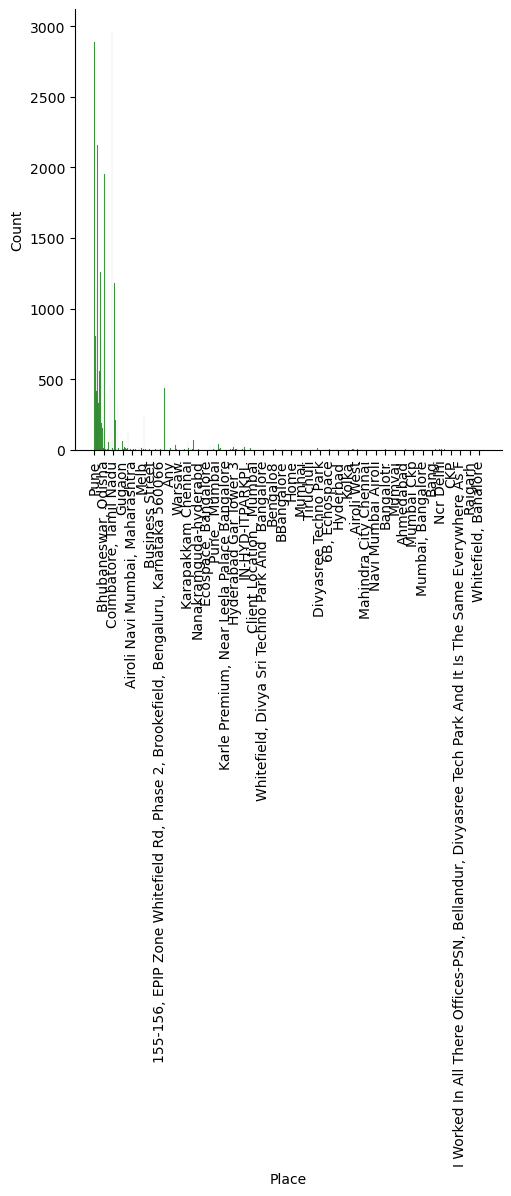

In [24]:
print(df['Place'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Place'],color='green');

x_labels = df['Place'].unique()[::20]  # 간격 조절
x_ticks = range(0, len(x_labels) * 20, 20)  # 간격에 해당하는 tick 위치 설정
plt.xticks(x_ticks, x_labels, rotation=90)  # 레이블 설정
plt.xlabel("Place")
plt.show()

count                    25895
unique                    4235
top       Associate Consultant
freq                      3013
Name: Title, dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x800 with 0 Axes>

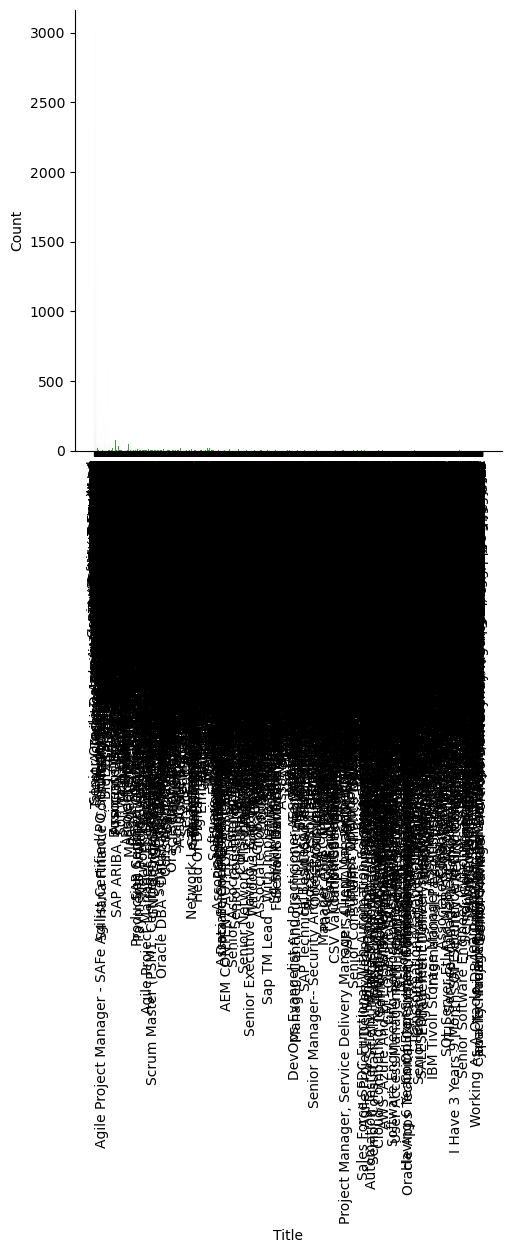

In [25]:
print(df['Title'].describe())
plt.figure(figsize=(6,8))
sns.displot(df['Title'],color='green');

plt.xticks(rotation=90)  # 90도 회전
plt.xlabel("Title")
plt.show()

I think numeric form of Date info will be useful, so I added New Column.

In [26]:
# 'Date' -> 'Date(New)' Format Change
df['Date'] = df['Date'].str.replace('^0', '10', regex=True)

# 'Date(New)' = Year&Month&Day (All Numeric)
df['Date(New)'] = pd.to_datetime(df['Date'], format='%d %b %Y').dt.strftime('%Y%m%d')

# Deleting 'Date' 
# data.drop('Date', axis=1, inplace=True)

# df.to_csv('data_with_date_new2.csv', index=False)
df.to_csv("after prep.csv", index=False)

I think Blank data of 'Job_type' can be 'Full Time'

In [27]:
# Fill the blank with 'Full Time'
df['Job_type'].fillna('Full Time', inplace=True)
df.to_csv("after prep.csv", index=False)

In [28]:
unique_titles = df['Title'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique titles:", number_of_unique_titles)
print("List of unique titles:")
for title in unique_titles:
    print(title)

Number of unique titles: 4236
List of unique titles:
Senior Consultant
Senior Software Engineer
Team Lead
Trade Finance Analyst
Senior Developer
Analyst   (working remotely)
Analyst
Senior Consultant C1
Senior Analyst
Cybersecurity Manager
Problem Manager
Associate Consultant
Engineer
Consultant
Associate Consultant SAP Concur
Software Engineer
Network Security Engineer
Trainer
Solution Architect
Manager
Team Manager
Associate Architect
Senior Professional II
Senior Oracle Database Administrator Consultant
Process Associate A3
Technical Writer Cum Technical Illustrator
Technical Manager
Technical Author
Senior Security Analyst
P.A. Accounts Payable Executive
Talent Acquisition Consultant   (working remotely)
Process Associate
Consultant B2
Senior Professional I Engineer
Scrum Master
Sr.Analyst - Software Engineer
Professional 1
Senior Manager
Data Analyst
Physical Verification Engineer
Sap Mm Consultant
Sr Manager
Senior Consultant   (working remotely)
Process Lead And Subject Matter E

In [29]:
unique_titles = df['Department'].unique()
number_of_unique_titles = len(unique_titles)

print("Number of unique Department:", number_of_unique_titles)
print("List of unique Department:")
for title in unique_titles:
    print(title)

Number of unique Department: 620
List of unique Department:
General Insurance Department
Software Development Department
Banking Operations Department
IT Infrastructure Services Department
Other Department
IT Consulting Department
Business Intelligence & Analytics Department
IT Security Department
IT Network Department
Operations Support Department
Data Science & Machine Learning Department
Finance Department
Corporate Training Department
Quality Assurance and Testing Department
Recruitment & Talent Acquisition Department
DBA / Data warehousing Department
SCM & Logistics Department
Other Hospital Staff Department
Aviation Engineering Department
DevOps Department
Facility Management Department
Hardware Department
Engineering & Manufacturing Department
Technology / IT Department
Downstream Department
Operations Department
Accounts payable Department
IT Support Department
Accounting & Taxation Department
Applied Innovation Exchange Department
Back Office Department
Software engineer  Depa

# Yonghee - Processing end

# Yonghee - Likes, Dislikes -> Vector

In [30]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import numpy as np

nltk.download('punkt')  # nltk data download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Create a Word2Vec model:
- sentences: List of tokenized sentences.
- vector_size: Size of the vectors for each word.
- window: Size of the context window considered by the model.
- min_count: Minimum frequency for a word to be included in the model.
- workers: Number of CPU cores used for model training.

In [32]:
# Likes Column's Blank -> ' '
df['Likes'].fillna('', inplace=True)

# Text -> Tokenize & Save as List
tokenized_likes = df['Likes'].apply(word_tokenize)

# Word2Vec model - Need to choose the 'Vector size'
word2vec_model = Word2Vec(sentences=tokenized_likes, vector_size=100, window=5, min_count=1, workers=4)

# Vector 
word_vectors = word2vec_model.wv

# make 'Sentence Vectors'
sentence_vectors = tokenized_likes.apply(lambda x: np.mean([word_vectors[token] for token in x if token in word_vectors], axis=0))

# Add 'Sentece_Vector' to dataframe
max_dimensions = max(sentence_vectors.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0))
for i in range(max_dimensions):
    df[f'Likes_vector_{i}'] = sentence_vectors.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\369004302.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Likes_vector_{i}'] = sentence_vectors.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\369004302.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Likes_vector_{i

In [33]:
# Dislikes Column's Blank -> ' '
df['Dislikes'].fillna('', inplace=True)

# Text -> Tokenize & Save as List
tokenized_dislikes = df['Dislikes'].apply(word_tokenize)

# Word2Vec model for Dislikes
word2vec_model_dislikes = Word2Vec(sentences=tokenized_dislikes, vector_size=100, window=5, min_count=1, workers=4)

# Vector for Dislikes
word_vectors_dislikes = word2vec_model_dislikes.wv

# Make 'Sentence Vectors' for Dislikes
sentence_vectors_dislikes = tokenized_dislikes.apply(lambda x: np.mean([word_vectors_dislikes[token] for token in x if token in word_vectors_dislikes], axis=0))

# Add 'Sentence_Vector' for Dislikes to DataFrame
max_dimensions_dislikes = max(sentence_vectors_dislikes.apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0))
for i in range(max_dimensions_dislikes):
    df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'D

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_30244\1445921884.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Dislikes_vector_{i}'] = sentence_vectors_dislikes.apply(lambda x: x[i] if isinstance(x, np.ndarray) and i < len(x) else np.nan)
C:\Users\SAMSUNG\AppData\Local\Temp\

In [34]:
df

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,...,Dislikes_vector_90,Dislikes_vector_91,Dislikes_vector_92,Dislikes_vector_93,Dislikes_vector_94,Dislikes_vector_95,Dislikes_vector_96,Dislikes_vector_97,Dislikes_vector_98,Dislikes_vector_99
0,Senior Consultant,Pune,Full Time,General Insurance Department,8 Sep 2023,4.0,4.0,3.0,3.0,4.0,...,0.221932,0.514804,0.182931,0.462730,0.793039,0.183435,-0.049868,-0.439711,0.208281,-0.566131
1,Senior Software Engineer,"Kolkata, West Bengal",Full Time,Software Development Department,7 Sep 2023,3.0,4.0,4.0,3.0,4.0,...,0.304713,0.634291,0.361611,0.546383,0.883344,0.408360,-0.315011,-0.360026,-0.071519,-0.484405
2,Senior Consultant,"Bengaluru/Bangalore, Karnataka",Full Time,Software Development Department,6 Sep 2023,4.0,4.0,5.0,3.0,3.0,...,0.255322,0.543818,0.274761,0.571997,0.957106,0.402961,-0.187169,-0.117020,-0.312827,-0.357822
3,Senior Consultant,"Pune, Maharashtra",Full Time,Banking Operations Department,6 Sep 2023,1.0,2.0,4.0,1.0,4.0,...,0.241120,0.190038,0.177896,0.422505,1.026385,0.539809,0.232132,-0.499463,-0.114505,-0.486118
4,Team Lead,"Noida, Uttar Pradesh",Full Time,IT Infrastructure Services Department,5 Sep 2023,4.0,5.0,4.0,4.0,4.0,...,0.269148,0.375299,0.221385,0.454342,0.819949,0.291557,-0.078951,-0.206831,-0.139068,-0.388290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26971,Project Manager,Bangalore,Full Time,Technology / IT Department,10 May 2018,2.0,3.0,2.0,1.0,2.0,...,0.336829,0.622863,0.471602,0.538250,0.977609,0.396765,-0.336283,-0.236535,-0.175536,-0.414577
26972,V And V Test Lead,Navi Mumbai,Full Time,Software Development Department,4 May 2018,5.0,5.0,5.0,4.0,5.0,...,0.309595,0.386466,0.128265,0.584559,0.959448,0.365868,0.018127,-0.178513,-0.294218,-0.483334
26973,Manager It Operations,Noida,Full Time,IT Support Department,10 Mar 2018,4.0,5.0,4.0,4.0,5.0,...,0.542542,0.065120,0.058154,0.392720,1.158476,0.377912,0.396555,-0.144993,-0.406915,-0.266568
26974,Consultant,NaN,Full Time,Software Development Department,5 Aug 2017,5.0,4.0,4.0,3.0,4.0,...,0.207425,0.203644,0.104910,0.164237,0.517805,0.225218,0.107938,-0.391017,-0.020574,-0.186718



<b> We plan to explore the following machine learning models:

### Classifiers:

<b>LogisticRegression
    
<b>SVC

<b>LinearSVC

<b>KNeighborsClassifier

<b>DecisionTreeClassifier

<b>RandomForestClassifier

<b>GaussianNB

<b>Perceptron
    
<b>SGDClassifier</b>

The database will be split 80% for training and 20% for testing.

<b>Precision score, Accuracy factors and F1 score</b> will be calculated to validate the success of the model training

# Division of Labor

Our initial plan is as follows:

Data Cleaning: Data cleaning, addressing missing data and outliers.

Feature Engineering: Focus on feature selection and engineering.

Modeling: Implementation and comparison of the chosen models.

Validation: Model validation and utilizing cross-validation techniques.

Hyperparameter Tuning: Optimization of model parameters as needed.

<b>Here is the initial role of each team member</b>:


# Jace Rhea

### Model Selection
### Data Analysis and Cleaning
### Project coordination

# Yonghee Kim

### Model Selection
### Data Analysis and Cleaning
### Model Training

# Yu Zhou

### Feature Engineering
### Hyper Parameter Tuning

# Nabil Sleiman

### Model Selection
### Model Evaluation
### Model Validation
### Presentation

Even though we outlined our initial plan, we are <b>prepared to adapt as the project evolves</b> and more insights are gained from the data and models.